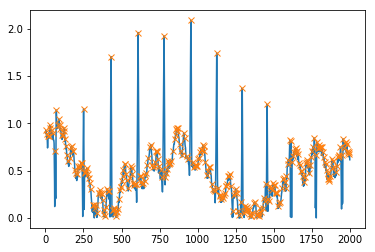

In [27]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
%matplotlib inline 
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
x = np.abs(x)
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [ ]:
#computing the dynamic time warping 

In [110]:
""""#Model Dataset 1
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
"""

#Model Dataset 2 
x = np.random.random((100,10))
y = np.random.randint(0,2,(100))


array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

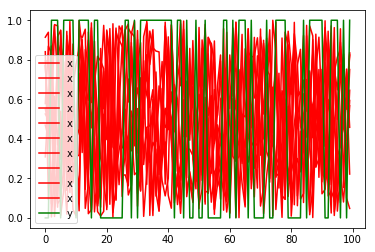

In [111]:
plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend();

In [120]:
#initialize distance matrix 
distance = np.zeros((len(y),len(x)))


for i in range(len(y)):
    for j in range(len(x)):
        distance[(i,j)] =  (x(j) - y(i))**2
        

TypeError: 'numpy.ndarray' object is not callable

In [103]:
distance 

array([[ 1.,  1.,  0.,  0.,  1.,  9.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  1.,  9.,  1.,  0.,  1.,  1.],
       [ 0.,  4.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,  4.],
       [ 4., 16.,  9.,  9.,  4.,  0.,  4.,  9.,  4., 16.],
       [ 0.,  4.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,  4.],
       [ 1.,  1.,  0.,  0.,  1.,  9.,  1.,  0.,  1.,  1.],
       [ 0.,  4.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,  4.],
       [ 4.,  0.,  1.,  1.,  4., 16.,  4.,  1.,  4.,  0.]])

In [104]:
#compute the distance matrix using the euclidean distance between points 


In [105]:
distance 

#view distance matrix 
def distance_cost_grid(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();
    

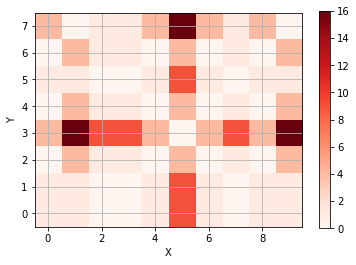

In [106]:
distance_cost_grid(distance)

In [84]:
cost_mat = np.zeros((len(y), len(x))) #initialize cost matrix 

In [92]:
#accumulated cost for taking all paths: we want to find the min path in the cost matrix 
#start from (0,0)
def Dynamic_time_warp(x,y):
#input is the two time series data => train and test 
#output is the minimum paths 

#compute the distance matrix using the euclidean distance between points 
    for i in range(len(y)):
        for j in range(len(x)):
            distance[(i,j)] =  (x[j] - y[i])**2
        
        
    cost_mat = np.zeros((len(y), len(x))) #initialize cost matrix 

    #Starting point 
    cost_mat[0,0] =  distance[0,0] 

    #moving along the first row form (0,0)
    for i in range(1, len(x)):
        cost_mat[0,i] =  distance[0,i] +cost_mat[0,i-1]

    #moving from (0,0) upwards 
    for i in range(1,len(y)):
        cost_mat[i,0] = distance[i,0] + cost_mat[i-1, 0]
    
    #compute minimum 
    for i in range(1,len(y)):
        for i in range(1,len(x)):
            cost_mat[i,j] = distance[i,j] + min(cost_mat[i-1, j-1], cost_mat[i-1, j], cost_mat[i, j-1])
        
    return cost_mat[i,j]
    

In [ ]:
#plot minimum paths 

""""" need to fix sequencing i think 
#knn function 
def knn(train,test):
    pred = [] #prediction 
    for i in enumerate(test):    #automatically adds counter 
        dist_min = [0]  #start at 0 
        clos_sq = [] 
        for j in range(1, len(train)):
            dist = Dynamic_time_warp(i[:-1],j[:-1])
            if dist < dist_min:
                dist_min = dist
                clos_sq = j 
        pred.append(clos_sq[-1])
    return classification_report(test[:,-1], pred) """ 

In [93]:
#knn function  using library 
#use minimum as metric for knn 
from scipy.spatial import distance 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#train 
#using gridsearch to find path based on min path from dtw 

parameters = {'n_neighbors': [3,4,5]} #k parameters 
clf = GridsearchCV(KNeighborClassifier(metric=Dynamic_time_warp), parameters, cv=3, verbose=1)
clf.fit(X,y)

#Evaluate 
y_pred = clf.predict(train)

#Show classification report 
print(classification_report(y_test, y_pred)

In [ ]:
#Use DTW with in-built knn from library 

